In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import scipy

In [2]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, consensus_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [3]:
from pylab import rcParams
rcParams['figure.figsize']=14, 8
RANDOM_SEED=42
LABELS=['Normal', "Fraud"]

In [4]:
df=pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
columns=df.columns.to_list()

columns=[c for c in columns if c not in ['Class']]

target='Class'

state=np.random.RandomState(RANDOM_SEED)
X=df[columns]
y=df[target]

print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [7]:
X_outliers=state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
X_outliers

array([[0.37454012, 0.95071431, 0.73199394, ..., 0.51423444, 0.59241457,
        0.04645041],
       [0.60754485, 0.17052412, 0.06505159, ..., 0.19598286, 0.04522729,
        0.32533033],
       [0.38867729, 0.27134903, 0.82873751, ..., 0.63755747, 0.88721274,
        0.47221493],
       ...,
       [0.32434691, 0.98353994, 0.40827419, ..., 0.51216976, 0.9162782 ,
        0.84937254],
       [0.44524954, 0.3220868 , 0.833226  , ..., 0.77285876, 0.39904372,
        0.14115936],
       [0.41545999, 0.95754477, 0.4161859 , ..., 0.87661358, 0.30901467,
        0.27756001]])

0    284315
1       492
Name: Class, dtype: int64


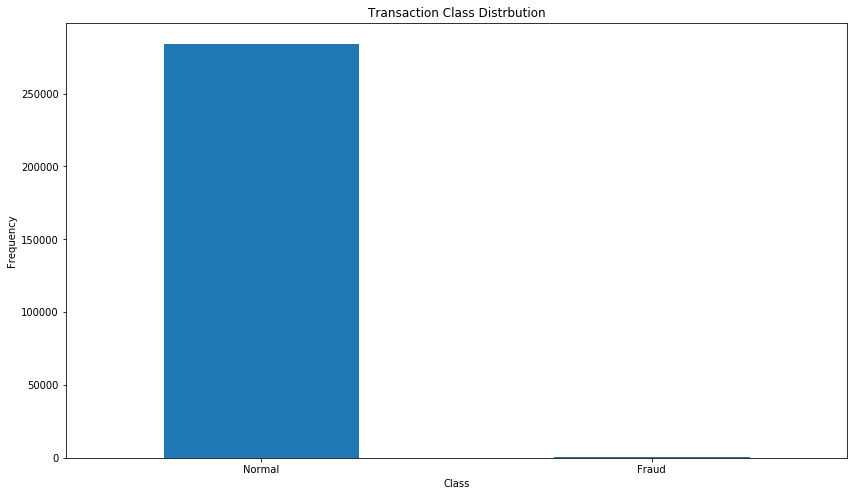

In [18]:
count_classes=pd.value_counts(df['Class'], sort=True)
print(count_classes)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distrbution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(range(2), LABELS)
plt.show()

In [9]:
fraud=df[df['Class']==1]
normal=df[df['Class']==0]
print(normal.shape, fraud.shape)

(284315, 31) (492, 31)


In [10]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_res, y_res=nm.fit_sample(X, y)

Using TensorFlow backend.


In [11]:
(X_res.shape, y_res.shape)

((984, 30), (984,))

In [12]:
from collections import Counter
print("Original Dataset shape {}".format(Counter(y)))
print("Resampled Dataset Shape {}".format(Counter(y_res)))

Original Dataset shape Counter({0: 284315, 1: 492})
Resampled Dataset Shape Counter({0: 492, 1: 492})


In [13]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc=StandardScaler()
X_res=sc.fit(X_res).transform(X_res)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_res, y_res, test_size=0.2, random_state=10)
print((X_train.shape), (X_test.shape))

(787, 30) (197, 30)


In [16]:
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred=model.predict(X_test)
print("Accuracy Score: {}\n".format(np.round(accuracy_score(y_pred, y_test)*100, 4)))
print("Classification Report: \n{}\n".format(classification_report(y_pred, y_test)))
cm=confusion_matrix(y_pred, y_test)
print("Confusion Matrix: \n{}".format(cm))

Accuracy Score: 97.4619

Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       105
           1       0.96      0.99      0.97        92

    accuracy                           0.97       197
   macro avg       0.97      0.98      0.97       197
weighted avg       0.98      0.97      0.97       197


Confusion Matrix: 
[[101   4]
 [  1  91]]
